In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    'mesin': [1000, 2000, 3000, 4000, 5000],
    'harga': [10, 25, 35, 55, 80]
}
df = pd.DataFrame(data)
df

,mesin,harga
0,1000,10
1,2000,25
2,3000,35
3,4000,55
4,5000,80


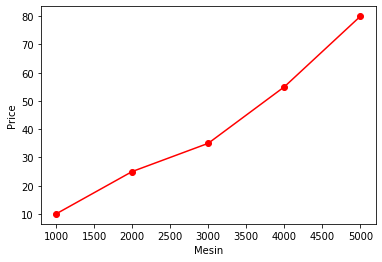

In [3]:
plt.plot(df['mesin'], df['harga'], 'r-o')
plt.xlabel('Mesin')
plt.ylabel('Price')
plt.show()

In [4]:
df.corr(method = 'pearson')

,mesin,harga
mesin,1.00000,0.98644
harga,0.98644,1.00000


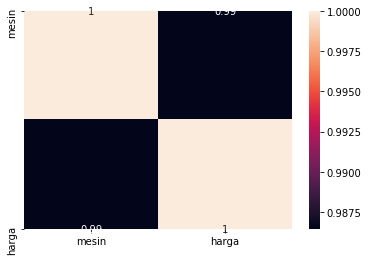

In [5]:
import seaborn as sb
sb.heatmap(df.corr(), annot=True)

In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(df[['mesin']], df['harga'])

#mencari gradient/ slope
print(model.coef_)
#intercept
print(model.intercept_)

[0.017]
-10.000000000000014


In [7]:
print(model.predict(df[['mesin']]))

[ 7. 24. 41. 58. 75.]


In [8]:
hargaPrediksiLR = model.predict(df[['mesin']])
df['hargaPrediksi'] = hargaPrediksiLR
df

,mesin,harga,hargaPrediksi
0,1000,10,7.0
1,2000,25,24.0
2,3000,35,41.0
3,4000,55,58.0
4,5000,80,75.0


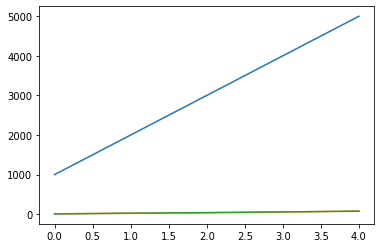

In [9]:
plt.plot(df)

In [9]:
year = [1, 2, 3, 4, 5, 6, 7, 8, 9]
sales = [651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518]
advertising = [23, 26, 30, 34, 43, 48, 52, 57, 58]

dataList = []

for i in range(len(year)):
    tempList = []
    tempList.append(year[i])
    tempList.append(sales[i])
    tempList.append(advertising[i])
    dataList.append(tempList)

dataDf = pd.DataFrame(dataList, columns=['year', 'sales', 'advertising'])
dataDf

,year,sales,advertising
0,1,651,23
1,2,762,26
2,3,856,30
3,4,1063,34
4,5,1190,43
5,6,1298,48
6,7,1421,52
7,8,1440,57
8,9,1518,58


In [10]:
model = linear_model.LinearRegression()
model.fit(dataDf[['advertising']], dataDf['sales'])

#mencari gradient/ slope
print(model.coef_)
#intercept
print(model.intercept_)

[23.42278559]
167.68294945122852


In [11]:
dataPrediksiLR = model.predict(dataDf[['advertising']])
dataDf['advertisingPrediksi'] = dataPrediksiLR
dataDf

,year,sales,advertising,advertisingPrediksi
0,1,651,23,706.407018
1,2,762,26,776.675375
2,3,856,30,870.366517
3,4,1063,34,964.057660
4,5,1190,43,1174.862730
5,6,1298,48,1291.976658
6,7,1421,52,1385.667800
7,8,1440,57,1502.781728
8,9,1518,58,1526.204514


In [13]:
model.predict([[23]])

array([706.40701809])

### Evaluation Metrics

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
print("Mean Absolute Error: ", round(mean_absolute_error(df['harga'], df['hargaPrediksi']),2))
print("Mean Squared Error: ", round(mean_squared_error(df['harga'], df['hargaPrediksi']),2))
print("RMSE: ", np.sqrt(round(mean_squared_error(df['harga'], df['hargaPrediksi']),2)) )
print("Median Absolute Error: ", round(median_absolute_error(df['harga'], df['hargaPrediksi']),2))
print("Mean Squared Log Error: ", round(mean_squared_log_error(df['harga'], df['hargaPrediksi']),2))
print("RMSLE: ", np.sqrt(round(mean_squared_log_error(df['harga'], df['hargaPrediksi']),2)))
print("R2 Score: ", r2_score(df['harga'], df['hargaPrediksi']))

Mean Absolute Error:  3.6
Mean Squared Error:  16.0
RMSE:  4.0
Median Absolute Error:  3.0
Mean Squared Log Error:  0.03
RMSLE:  0.17320508075688773
R2 Score:  0.9730639730639731
